In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

In [2]:
data = pd.read_csv('ipl_data.csv')

In [3]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
data.shape

(76014, 15)

In [5]:
 data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


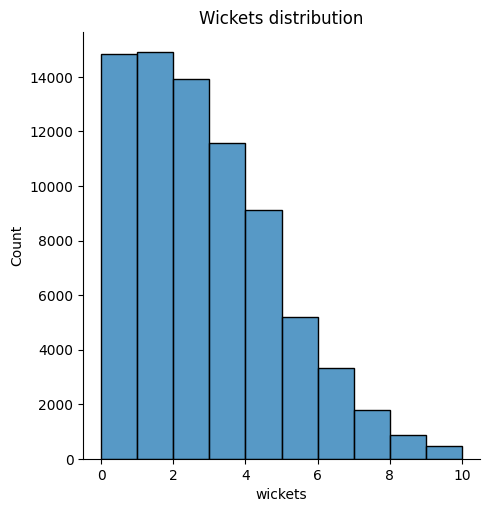

In [7]:
sns.displot(data['wickets'],kde=False,bins=10)
plt.title('Wickets distribution')
plt.show()

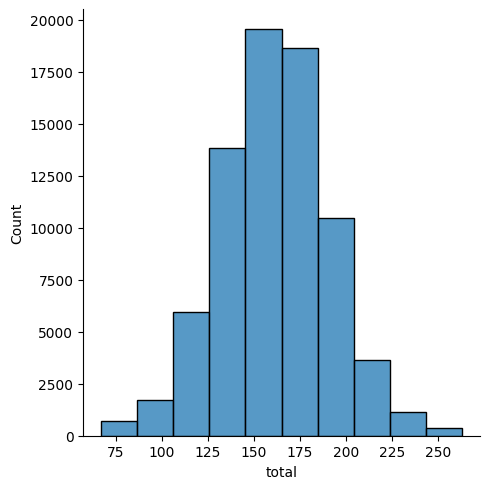

In [8]:
sns.displot(data['total'],kde=False,bins=10)
# plt.

In [9]:
irrelevant = ['mid','date','venue','batsman','bowler','striker','non-striker']
data = data.drop(irrelevant,axis=1)

In [10]:
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']
print(data.shape)
data.bat_team.value_counts().count()

(76014, 8)


14

In [13]:
data = data[(data['bat_team'].isin(const_teams)) & (data['bowl_team'].isin(const_teams))]
data.bat_team.value_counts().count()

8

In [14]:
data = data[data.overs >=5.0]
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<Axes: >

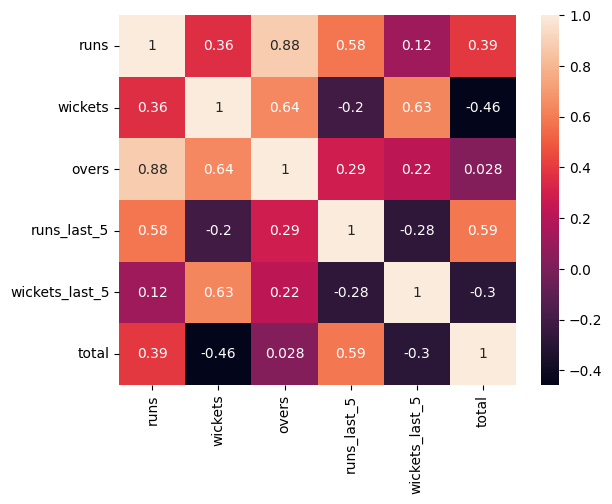

In [15]:
# from seaborn import heatmap
newdata=data.copy()
newdata = newdata[['runs','wickets','overs','runs_last_5','wickets_last_5','total']]
sns.heatmap(newdata.corr(),annot=True)

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in ['bat_team','bowl_team']:
    data[col] = le.fit_transform(data[col])
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [17]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[0,1])],remainder='passthrough')
data = np.array(columnTransformer.fit_transform(data))

In [18]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data,columns=cols)


In [19]:
x = df.drop(['total'],axis=1)
y = df['total']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
6415,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,43.0,1.0,6.4,35.0,1.0
13993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,117.0,8.0,19.1,43.0,3.0
10389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,85.0,8.0,15.3,17.0,3.0
25330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,61.0,7.0,13.4,33.0,1.0
38939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,6.0,8.6,19.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,80.0,6.0,11.6,19.0,3.0
11284,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,84.0,4.0,10.5,34.0,2.0
38158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,148.0,5.0,17.1,45.0,2.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,62.0,4.0,9.1,28.0,2.0


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [22]:
pred = dt.predict(xtest)

In [23]:
r2_score(ytest,pred)

0.8574228295673686

In [24]:
mean_squared_error(ytest,pred)

127.44250186985789

In [25]:
mean_absolute_error(ytest,pred)

4.06101969583645

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
r2_score(pred,ytest)

0.4846023308074695

In [27]:
str(lr.score(xtrain, ytrain) * 100)
str(lr.score(xtest,ytest) * 100)
# print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
# models["linreg"] = test_score_linreg

'66.78598203684052'

### Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)
str(rf.score(xtrain,ytrain)*100)

'99.05665369513324'

In [29]:
str(rf.score(xtest,ytest)*100)

'93.56543204301289'

### Support Vector MAchine

In [30]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(xtrain,ytrain)

SVR()

In [ ]:
str(svm.score(xtrain,ytrain)*100)
print(str(svm.score(xtest,ytest)*100))

58.25637237240146


In [43]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=rf):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

# Test 1
## Batting Team : Delhi Daredevils
## Bowling Team : Chennai Super Kings
## Final Score : 147/9

In [44]:
batting_team= 'Delhi Daredevils'
bowling_team = 'Chennai Super Kings'
score = score_predict(batting_team,bowling_team,overs=10.2,runs=68,wickets=3,runs_last_5=29,wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 147 || Actual Score : 147


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [45]:
batting_team = 'Mumbai Indians'
bowling_team = 'Kings XI Punjab'
score = score_predict(batting_team,bowling_team,overs=12.3,runs=113,wickets=2,runs_last_5=55,wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 187 || Actual Score : 176


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [49]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 185 || Actual Score : 185


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [51]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 173 || Actual Score : 172


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5 
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [55]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 106 || Actual Score : 110


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [53]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 146 || Actual Score : 153


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 7
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [57]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 154 || Actual Score : 146


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [58]:
import pickle
filename = 'ml_model.pkl'
pickle.dump(rf,open(filename,'wb'))